<a href="https://colab.research.google.com/github/Bhargavi9820/CodeClause_fake_news_dectection/blob/main/fake_news_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("news.csv")

In [ ]:
X = df['text']

In [ ]:
Y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

In [ ]:
y_pred = pac.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9337190952130457


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("Confusion matrix:", confusion_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix = [[911, 57], [69, 864]]

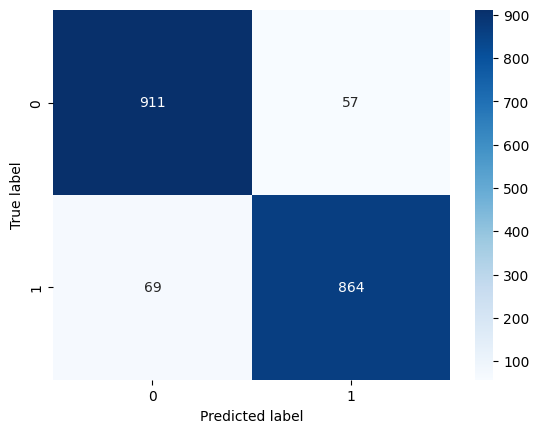

In [ ]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()